In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
import time
import pandas as pd
import cx_Oracle

from IPython import display

font_location = "C:\Windows\Fonts\malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)
plt.rcParams['axes.unicode_minus'] = False

In [4]:
con = cx_Oracle.connect('open_source/1111@localhost:1521/xe')
cur = con.cursor()

In [17]:
cur.execute('select * from weather')

columns = ['DATE_TIME','NX', 'NY', '기온', '시간1_강수량', '강수형태',
                         '습도', '풍속', '풍향', '동서바람성분', '남북바람성분']
df = pd.DataFrame(cur,columns=columns)

df

,DATE_TIME,NX,NY,기온,시간1_강수량,강수형태,습도,풍속,풍향,동서바람성분,남북바람성분
0,2022-12-28 05:00:00,58,125,0.0,0.0,-2.1,77.0,268.0,2.9,2.9,0.1
1,2022-12-28 06:00:00,58,125,0.0,0.0,-2.8,60.0,290.0,3.0,2.8,-0.9


In [6]:
plot_list = ['기온','시간1_강수량', '강수형태','습도', '풍속','풍향', '동서바람성분', '남북바람성분']

In [15]:
def plt_update(ax):
    plot_index = 0;
    for row_index in range(4):
        for col_index in range(2):
            plot_name = plot_list[plot_index]
            ax[row_index][col_index].plot(df['DATE_TIME'],df[plot_name])
            plot_index +=1
            hdisplay.update(fig)
            
            ax[row_index][col_index].set_xlabel('날짜')
            ax[row_index][col_index].set_ylabel('측정값')
            ax[row_index][col_index].set_xticklabels(rotation=90, labels=df['DATE_TIME'])


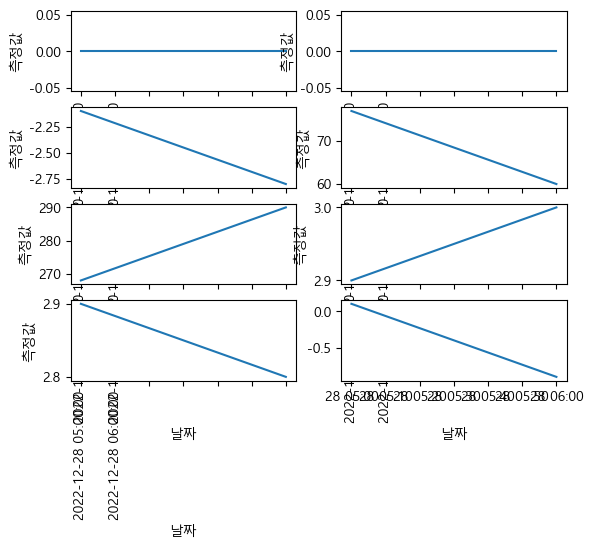

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_41108\194809598.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[row_index][col_index].set_xticklabels(rotation=90, labels=df['DATE_TIME'])


In [16]:
fig,ax = plt.subplots(4,2)

hdisplay = display.display("", display_id=True)

plt_update(ax)

plt.close()